In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
full_data = pd.read_csv(r"C:\Users\Edwin\Downloads\05_11_21_CdSe_Abs_Fixed_Blanking_And_Order")

wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]
full_data = full_data[full_data['Sonication Time (Min)']==10]

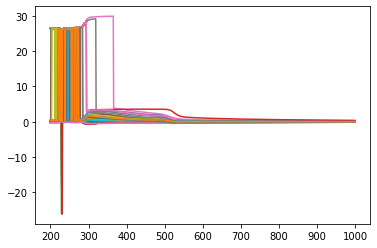

In [23]:
spectras = full_spectra
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)

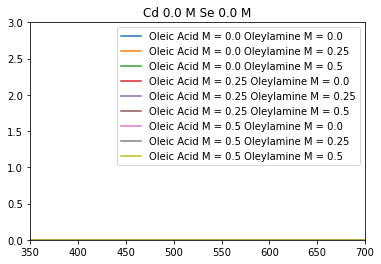

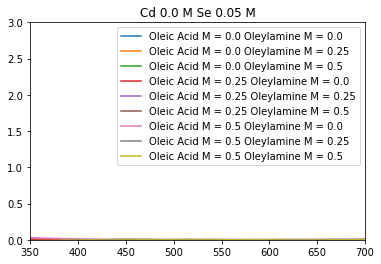

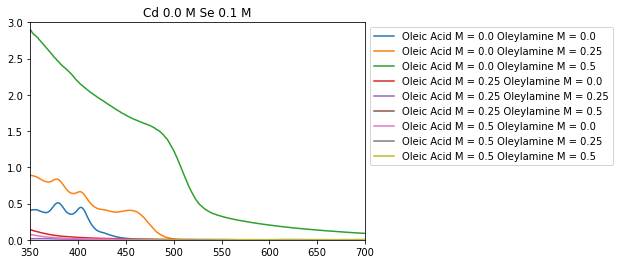

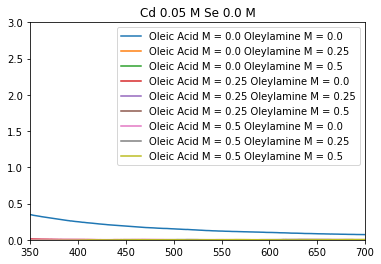

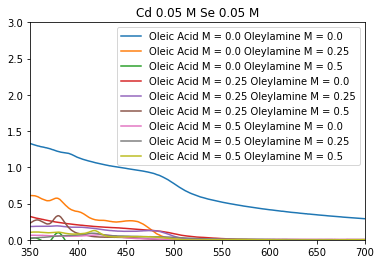

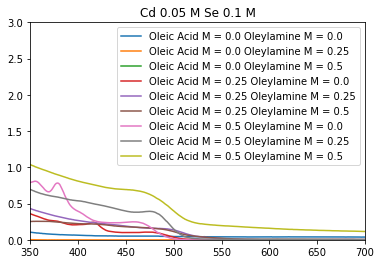

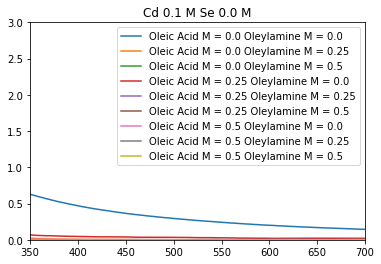

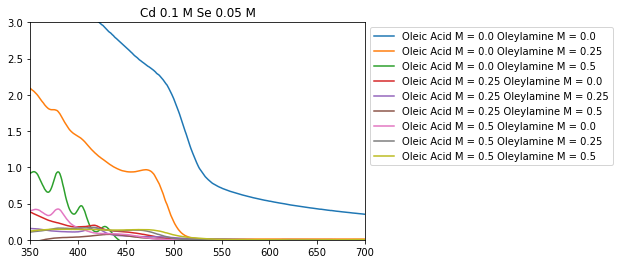

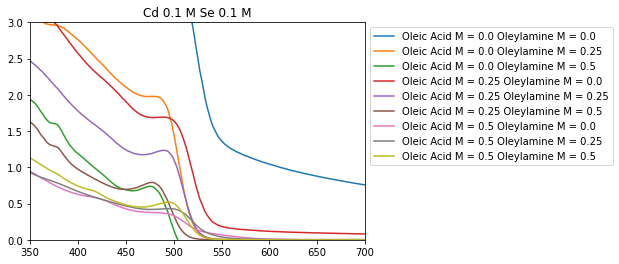

In [24]:
cd_group = full_data.groupby('CdAc concentration molarity')

for cd, group in cd_group:
    se_group = group.groupby('Se concentration molarity')
    for se, group_i in se_group:    
        fig, ax = plt.subplots()
        for i, row in group_i.iterrows():
            spectra = list(row[wavelength_columns])
            oly_conc = row['Oleylamine concentration molarity']
            oa_conc = row['OleicAc concentration molarity']
            label = "Oleic Acid M = " + str(oa_conc) + " Oleylamine M = " + str(oly_conc)
            ax.plot(wavelengths, spectra, label=label)
            ax.set_title('Cd ' + str(round(cd,3)) + ' M ' + 'Se ' + str(round(se,3)) + ' M')
            ax.set_xlim(350,700)
            ax.set_ylim(0,3)
        ax.legend(bbox_to_anchor=(1, 1))